# Bike Sharing Assignment
> Develop a multiple linear regression model to forecast post-COVID-19 demand for BoomBikes, a US-based bike-sharing service.


## Table of Contents
* [General Info](#general-information)
* [Libraries Used](#Libraries-used)
* [Reading & understanding the data](#Reading-and-understanding-data)
* [Data cleaning](#data-cleaning)
* [EDA](#eda)
  * [Univariate Analysis](#Univariate_Analysis)
  * [Bivariate Analysis](#Bivariate_Analysis)
  * [Multivariate Analysis](#Multivariate_Analysis)
* [Data Preparation & Feature Engineering](#data-preparation)
* [Training the model](#training-the-model)
* [Residual analysis](#residual-analysis)
* [Model evaluation](#model-evaluation)
* [Conclusions](#conclusions)


## General Information

This project involves building a multiple linear regression model to predict the demand for BoomBikes. The goal is to identify significant factors influencing bike demand, enabling BoomBikes to make informed, data-driven decisions as they navigate post-pandemic challenges.

**Background:**

BoomBikes has experienced a significant revenue decline due to the COVID-19 pandemic. To recover and grow, the company seeks to understand the specific factors influencing bike demand in the American market. They aim to identify the variables that significantly predict bike demand and how well these variables describe overall demand. To support this analysis, they have gathered a comprehensive dataset containing daily bike rental data and various predictors, such as weather conditions and user behavior.

**Business Problem:**

The insight into which variables impact bike demand, and how well those variables describe the bike demands, is crucial for BoomBikes to plan and execute a business strategy that maximizes revenue, meets customer expectations, and ensures competitiveness in the bike-sharing market. By accurately modeling daily bike demands, BoomBikes aims to prepare for post-pandemic demand, differentiate itself from competitors, and accelerate its financial recovery.

**Dataset:**

The dataset used in this project is "day.csv," which includes daily bike rental data and various independent variables, such as weather conditions, season, and user behavior, that might affect bike-sharing demand.


## Libraries Used
- Python - version 3.8
- Pandas - version 1.2
- NumPy
- Matplotlib
- Seaborn
- scikit-learn - version 0.24
- statsmodels - version 0.12
- Warnings
- Calendar

In [93]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import ProbPlot, qqplot

## Reading and Understanding Data

Let us import all the necessary libraries for this project and read the `day.csv` dataset

In [95]:
# load data 'day.csv'
import pandas as pd
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Inspect the various aspects of the housing dataframe

In [96]:
df.shape

(730, 16)

The dataset (we named it `df`) has 730 rows and 16 columns

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


As we can see, there's no column with null values.

In [98]:
# statistical description
df.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,730.0,365.500000,210.877136,1.000000,183.250000,365.500000,547.750000,730.000000
season,730.0,2.498630,1.110184,1.000000,2.000000,3.000000,3.000000,4.000000
yr,730.0,0.500000,0.500343,0.000000,0.000000,0.500000,1.000000,1.000000
mnth,730.0,6.526027,3.450215,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,730.0,0.028767,0.167266,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,730.0,2.997260,2.006161,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,730.0,0.683562,0.465405,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,730.0,1.394521,0.544807,1.000000,1.000000,1.000000,2.000000,3.000000
temp,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
atemp,730.0,23.726322,8.150308,3.953480,16.889713,24.368225,30.445775,42.044800


Summary of variables, observations:

Humidity (`hum`):
* The minimum humidity value of 0% is unrealistic. A reasonable cut-off point should be set at 1%, as this is typically the lowest recorded humidity in natural conditions.

Season (`season`):
* The seasons in the dataset appear to be assigned in a way that doesn’t align with typical meteorological definitions. For example, season 1 (winter) is assigned from January 1, 2018, to March 20, 2018.

Usage Patterns (`casual`, `registered` & `cnt`):
* Preliminary inspection reveals that bike usage significantly increases during warmer months, with higher counts in 2019 compared to 2018. This suggests that seasonality and year are important factors influencing bike rentals, and they should be carefully considered in the modeling phase.

## Data Cleaning

In [99]:
# drop the row with 'hum' = 0.0
df = df[df['hum'] != 0.0]
df.shape

(729, 16)

Remove irrelevant columns:
* `instant`: it is just an index and has no analytical value.
* `dteday`: date information is already available in `yr` and `mnth`, and the specific day is not relevant.
* `casual` and `registered`: their sum is captured in the target variable 'cnt'.

In [100]:
# remove irrelevant columns
df.drop(['instant', 'dteday', 'casual', 'registered'], axis=1, inplace=True)

# Check if the columns have been removed
df.shape

(729, 12)

In step 1, we have already seen that there are no null values present.

Next, we check for duplicates:


In [101]:
df.duplicated().sum()

0

No duplicates are present.

Look for outliers:

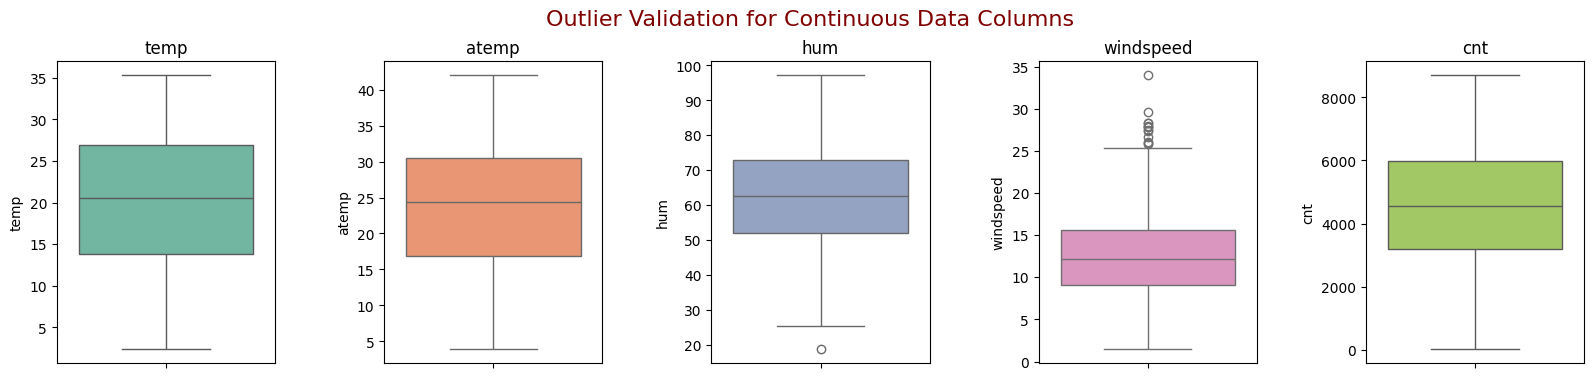

In [102]:
# Define the numeric columns to check for outliers
numeric_columns = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

# Set up the subplots for visualization
fig, axes = plt.subplots(nrows=1, ncols=len(numeric_columns), figsize=(16, 4))
fig.suptitle('Outlier Validation for Continuous Data Columns', fontsize=16, color='maroon')
fig.tight_layout()
fig.subplots_adjust(wspace=0.5, top=0.85)

# Define the color palette
colors = sns.color_palette("Set2", len(numeric_columns))

# Plot boxplots for each numeric column to identify outliers
for i, col_name in enumerate(numeric_columns):
    sns.boxplot(ax=axes[i], y=df[col_name], color=colors[i])
    axes[i].set_title(col_name, weight='light', fontsize=12)

plt.show()

Conclusion regarding outliers:
* No significant outliers observed

Standardizing data

In [103]:
# Renaming some column names to improve readability
df.rename(columns={
    'yr': 'year',
    'mnth': 'month',
    'dteday': 'date',
    'atemp': 'feels_like',
    'hum': 'humidity',
    'weathersit': 'weather',
    'cnt': 'bike_rentals' # out target variable
}, inplace=True)
df.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weather', 'temp', 'feels_like', 'humidity', 'windspeed',
       'bike_rentals'],
      dtype='object')

In [104]:
# Replacing categorical values based on the values in dictionary

# Replace 'weather' column values
df['weather'] = df['weather'].map({
    1: 'Sunny',
    2: 'Cloudy',
    3: 'Rainy',
    4: 'Stormy'
})

# Replace 'weekday' column values
df['weekday'].replace({
    0: 'Sun', 1: 'Mon', 2: 'Tue',
    3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
}, inplace=True)

# Replace 'season' column values
df['season'] = df['season'].map({
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
})

# Replace 'month' column values
df['month'] = df['month'].apply(lambda x: calendar.month_abbr[x])

df.head()

,season,year,month,holiday,weekday,workingday,weather,temp,feels_like,humidity,windspeed,bike_rentals
0,Spring,0,Jan,0,Sat,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sun,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Mon,1,Sunny,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tue,1,Sunny,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wed,1,Sunny,9.305237,11.46350,43.6957,12.522300,1600


## EDA - Exloratory Data Analysis

**Univariate Analysis:**

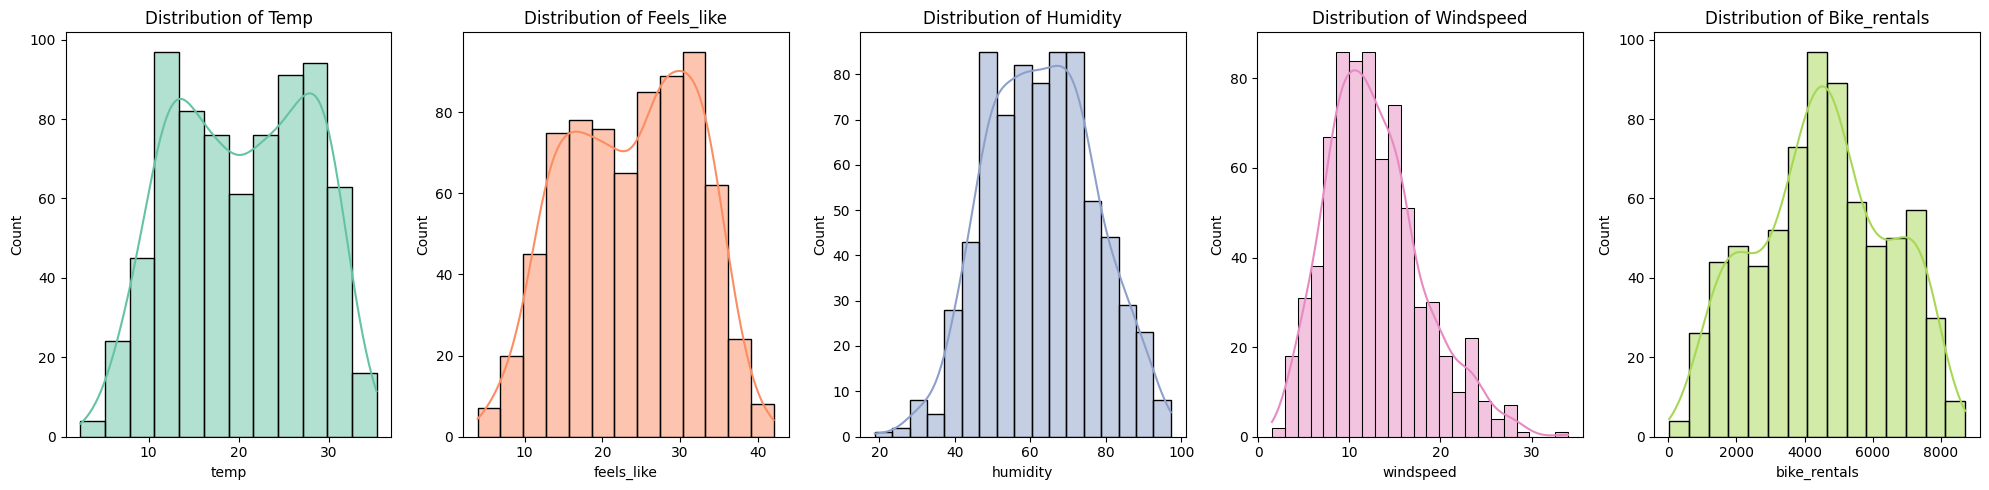

In [105]:
# Histograms for Continuous Variables
continuous_variables = ['temp', 'feels_like', 'humidity', 'windspeed', 'bike_rentals']
colors = sns.color_palette("Set2", len(continuous_variables))

fig, axes = plt.subplots(1, len(continuous_variables), figsize=(20, 5))
for i, var in enumerate(continuous_variables):
    sns.histplot(df[var], ax=axes[i], kde=True, color=colors[i])
    axes[i].set_title(f'Distribution of {var.capitalize()}', fontsize=12)
plt.tight_layout()
plt.show()

Inferences:
* `Temperature`: Bike rentals peak at 11-13°C and 26-28°C, with reduced activity in extreme temperatures below 7°C and above 32°C.
* `Feels_like`: Bike rentals are more frequent when the "feels like" temperature is between 25°C and 34°C, peaking around 32°C, with another elevated point around 13°C. Rentals drop when feels-like temperatures are below 11 °C or above 36°C
* `Humidity`: Bike rentals are more frequent when humidity levels are between 48% and 76%.
* `Windspeed` shows a left-skewed distribution, with most values concentrated between 5 and 16 mph, indicating that moderate wind conditions are most common during bike rentals, while higher wind drastically reduce bike rentals.

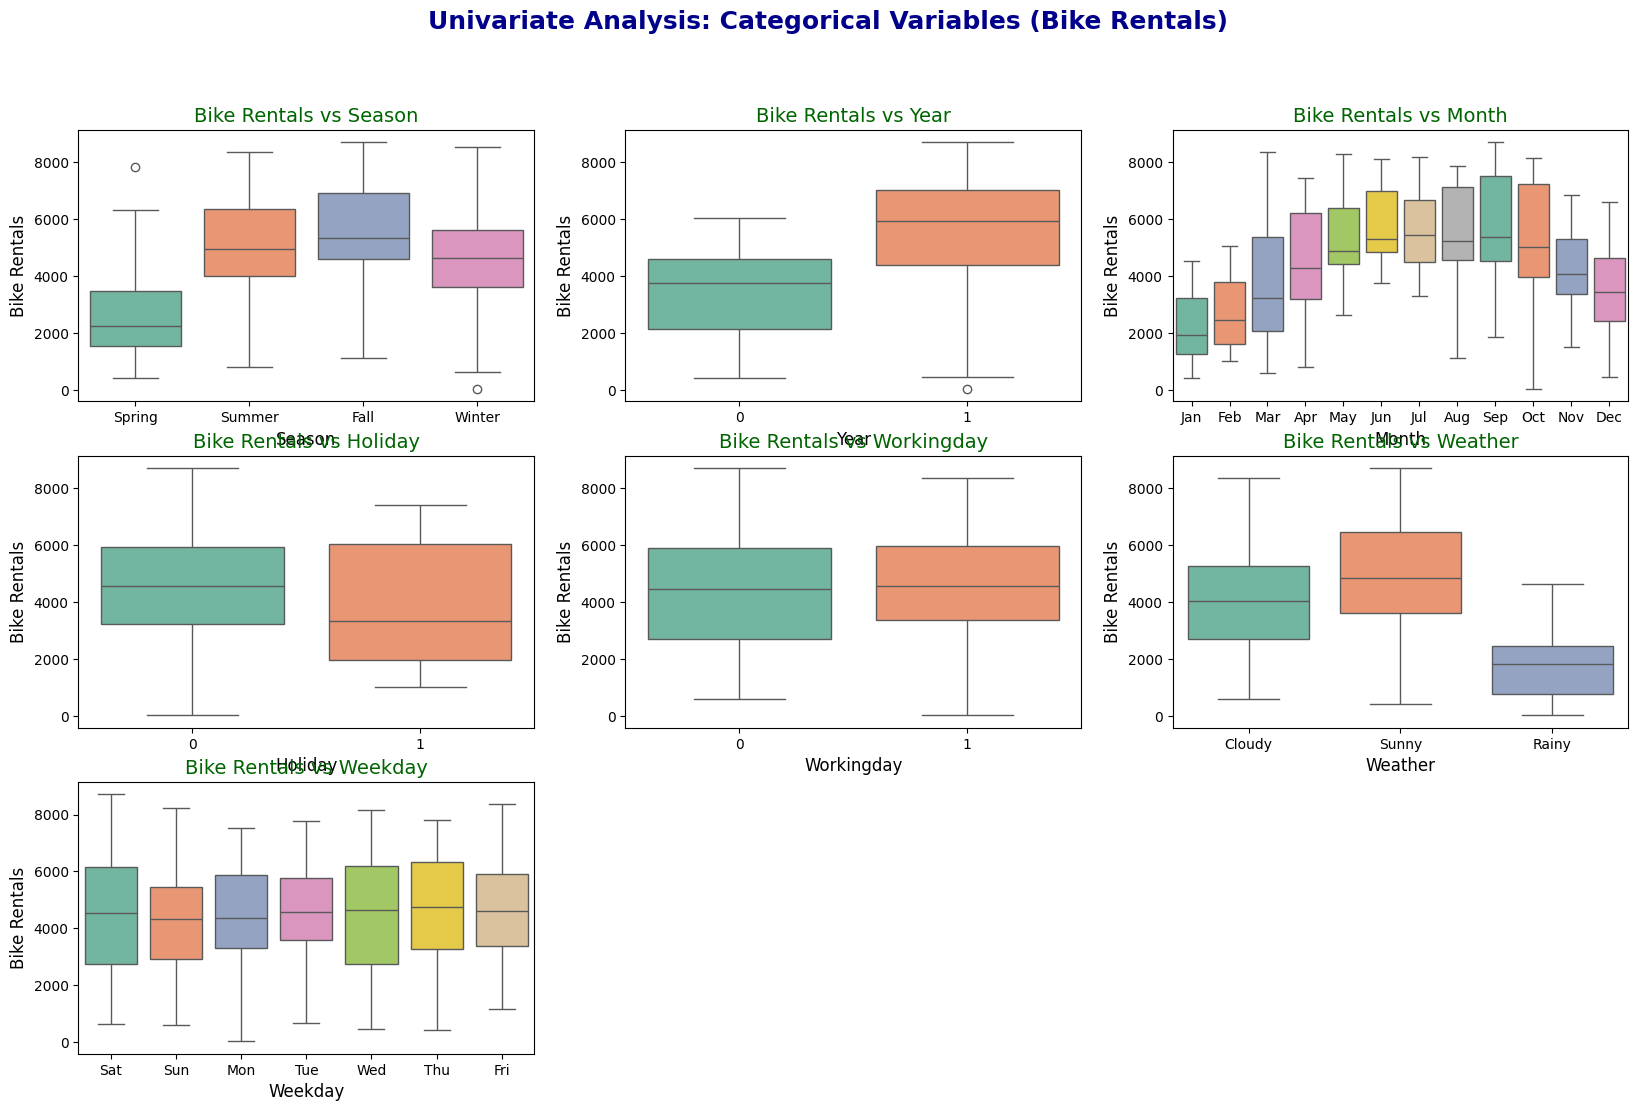

In [106]:
# box plots for categorical variables against bike rentals
categorical_variables = ['season', 'year', 'month', 'holiday', 'workingday', 'weather', 'weekday']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 12))
fig.suptitle('Univariate Analysis: Categorical Variables (Bike Rentals)', fontsize=18, fontweight='bold', color='darkblue')
for i, var in enumerate(categorical_variables):
    sns.boxplot(x=var, y='bike_rentals', data=df, ax=axes[i//3, i%3], palette="Set2")
    axes[i//3, i%3].set_title(f'Bike Rentals vs {var.capitalize()}', fontsize=14, color='darkgreen')
    axes[i//3, i%3].set_xlabel(f'{var.capitalize()}', fontsize=12)
    axes[i//3, i%3].set_ylabel('Bike Rentals', fontsize=12)
if len(categorical_variables) < len(axes.flatten()):
    for j in range(len(categorical_variables), len(axes.flatten())):
        fig.delaxes(axes.flatten()[j])
plt.show()

Inferences:
* `Bike Rentals vs Season`: Fall recorded the highest bike rentals, followed by summer, with spring having the lowest rentals.
* `Bike Rentals vs Year`: There was an increase in bike rentals in the second year, with a noticeable jump compared to the first year.
* `Bike Rentals vs Month`: September had the highest bike rentals, followed by consistent activity from April through October, with a dip during winter months.
* `Holiday`: Bike rentals are lower on holidays compared to non-holidays.
* `Weather`: Rentals peak in sunny weather and drop during rain or snow.
* `Weekday/Workingday`: No noticeable difference in bike rentals between weekdays and weekends or between working and non-working days.

**Bivariate Analysis**

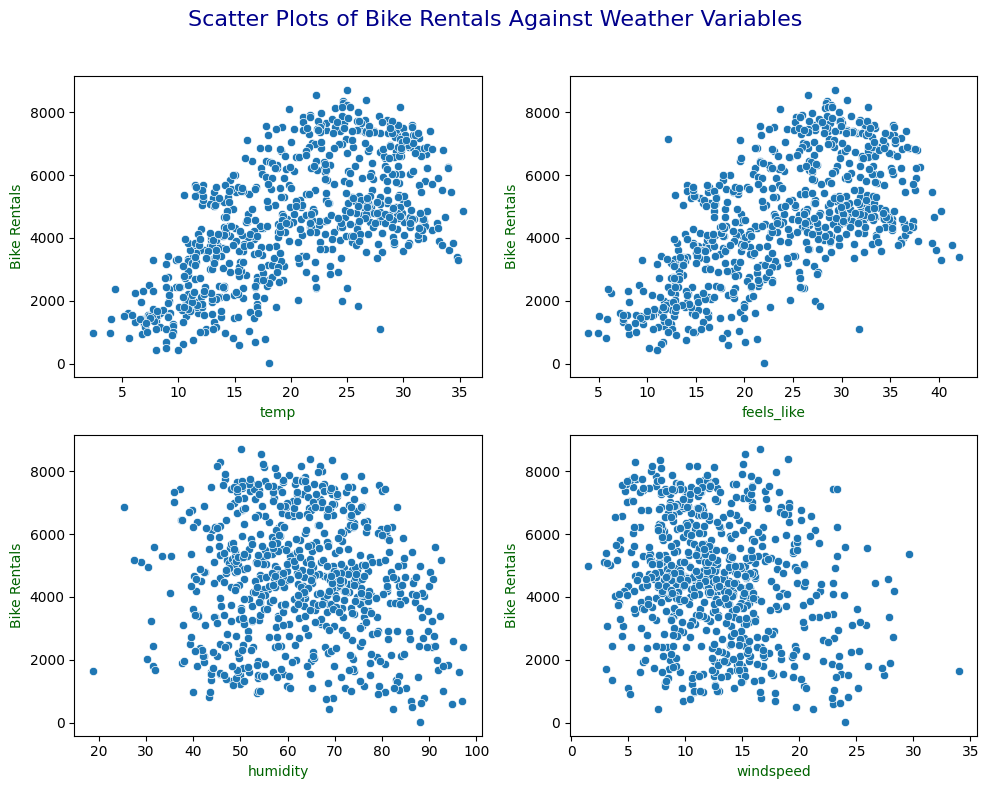

In [107]:
# Scatter plots for weather variables against bike rentals
columns = ['temp', 'feels_like', 'humidity', 'windspeed']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
fig.suptitle('Scatter Plots of Bike Rentals Against Weather Variables', fontsize=16, color='darkblue')
axes = axes.flatten()
for ax, var in zip(axes, columns):
    sns.scatterplot(ax=ax, x=var, y='bike_rentals', data=df, palette='Set2')
    ax.set_xlabel(var, fontsize=10, color='darkgreen')
    ax.set_ylabel('Bike Rentals', fontsize=10, color='darkgreen')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Inferences:
* `Temperature`: Positive correlation; more rentals with higher temperatures.
* `Feels_like`: Positive correlation; rentals increase in warmer "feels like" conditions.
* `Humidity` & `Windspeed`: Weak effect overall, but rentals drop at high humidity (80+)/high windspeeds (25+).

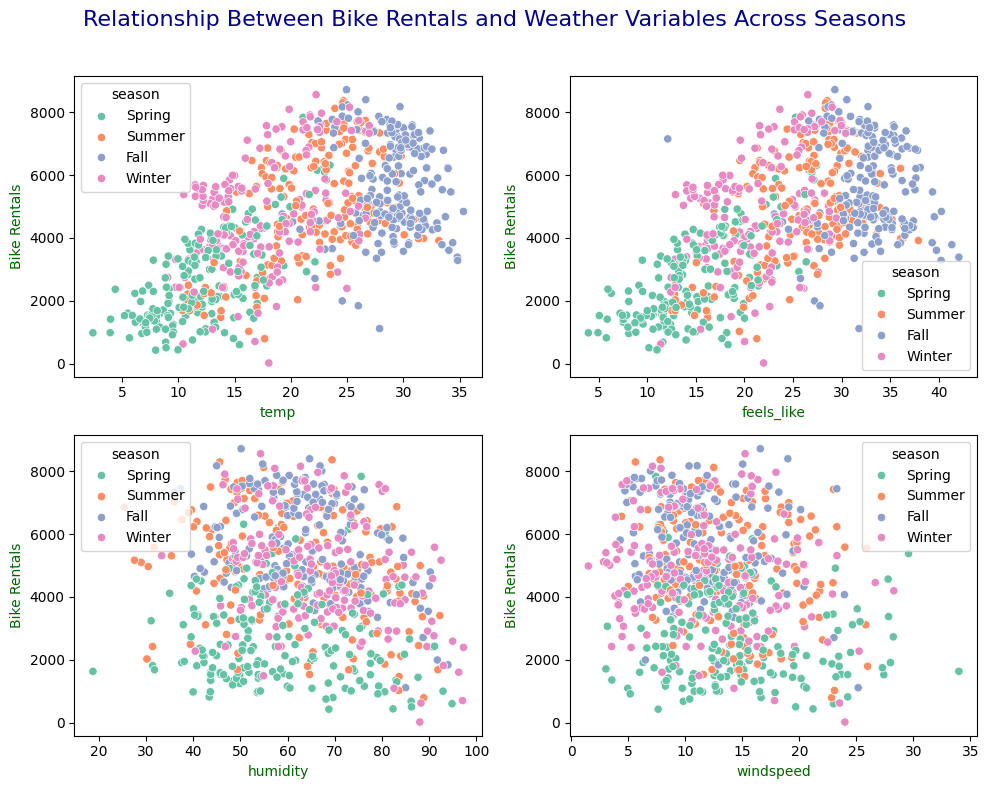

In [108]:
# Scatter plots for weather variables by season
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
fig.suptitle('Relationship Between Bike Rentals and Weather Variables Across Seasons', fontsize=16, color='darkblue')
axes = axes.flatten()
for ax, var in zip(axes, columns):
    sns.scatterplot(ax=ax, x=var, y='bike_rentals', data=df, hue='season', palette='Set2')
    ax.set_xlabel(var, fontsize=10, color='darkgreen')
    ax.set_ylabel('Bike Rentals', fontsize=10, color='darkgreen')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

<Figure size 600x400 with 0 Axes>

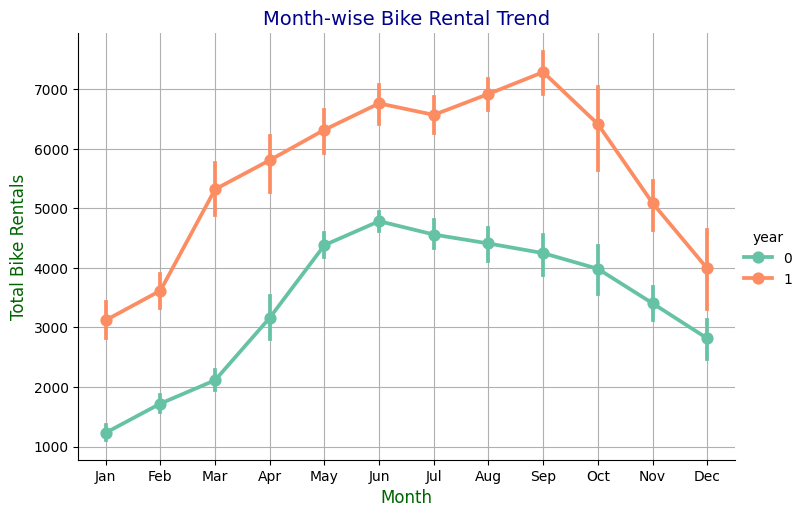

In [109]:
# Month-wise trend analysis of bike rentals
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure(figsize=(6, 4))
sns.catplot(data=df, x='month', y='bike_rentals', order=month_order, kind="point", hue='year', marker='o', palette='Set2', aspect=1.5)
plt.title('Month-wise Bike Rental Trend', fontsize=14, color='darkblue')
plt.xlabel('Month', fontsize=12, color='darkgreen')
plt.ylabel('Total Bike Rentals', fontsize=12, color='darkgreen')
plt.grid(True)
plt.show()

Inferences:
* Year-over-Year Growth: 2019 consistently shows higher rental counts than 2018.
* Monthly Patterns: Both years show similar trends, with peaks in summer (May-Oct) and troughs in winter, emphasizing the need for flexible inventory.

**Multivariate Analysis**

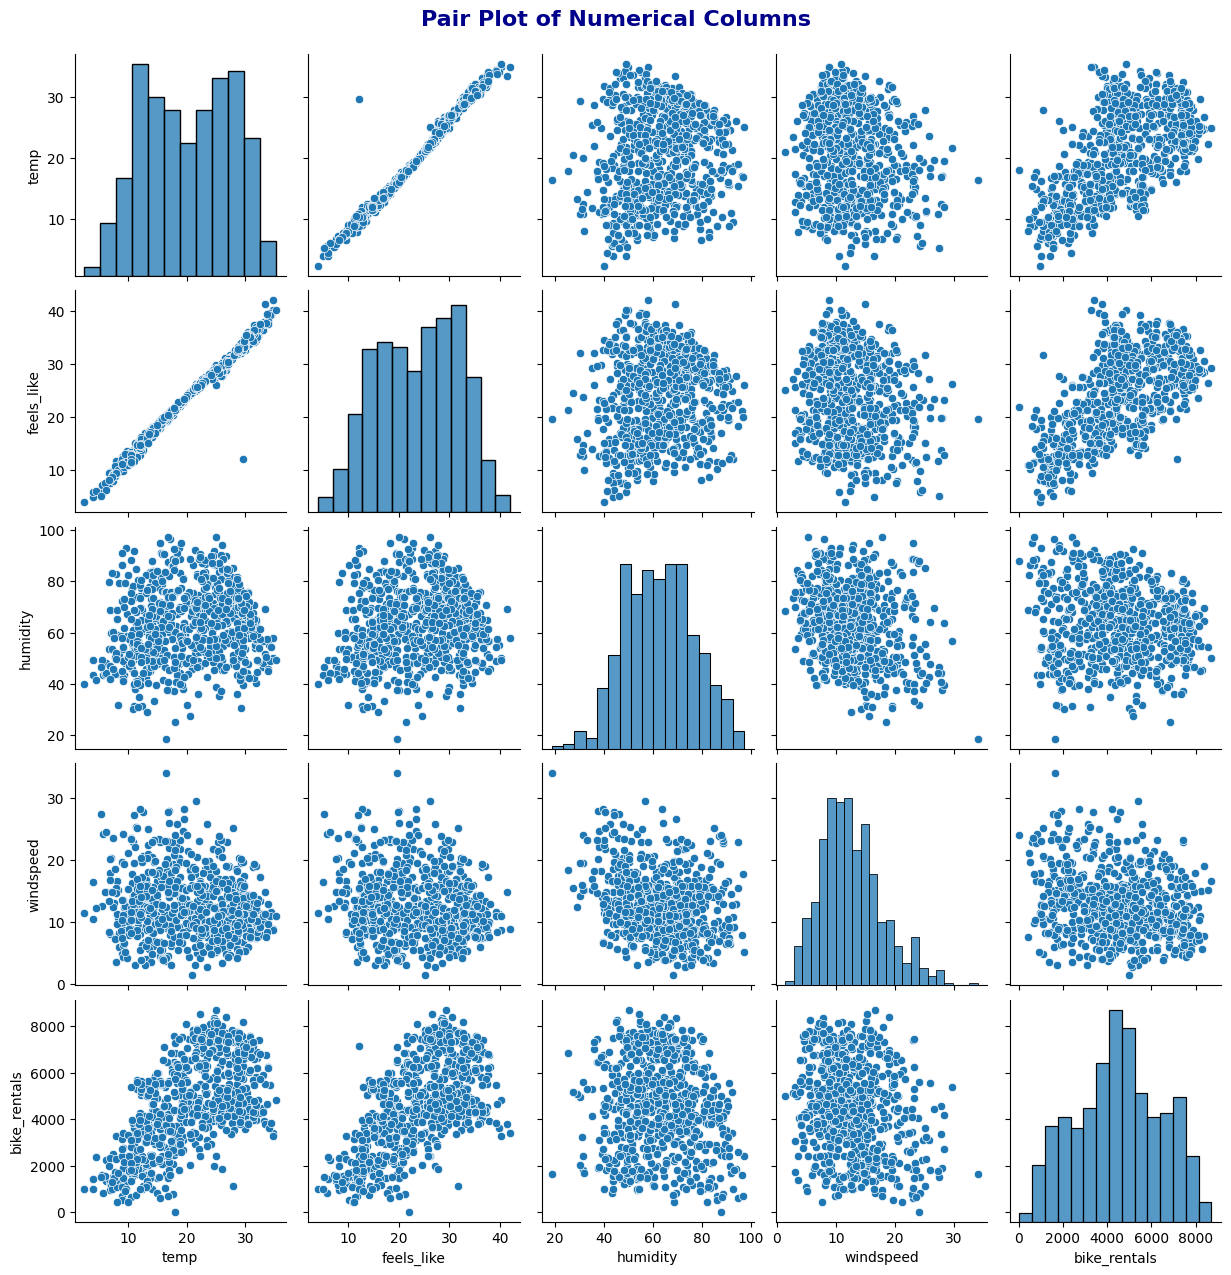

In [110]:
# Pair Plot to Visualize Relationships Between Continuous Variables
sns.pairplot(df, vars=['temp', 'feels_like', 'humidity', 'windspeed', 'bike_rentals'], palette="Set2")
plt.suptitle('Pair Plot of Numerical Columns', fontsize=16, fontweight='bold', y=1.02, color='darkblue')
plt.show()

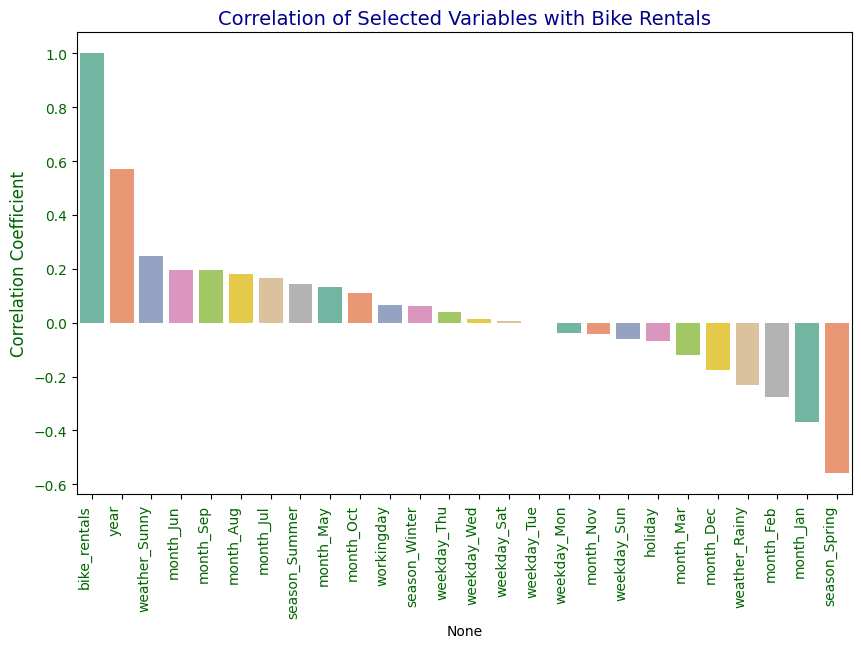

In [111]:
# Select the columns not listed in the previous heatmap plus 'bike_rentals'
excluded_columns = ['temp', 'feels_like', 'humidity', 'windspeed']
selected_columns = [col for col in df.columns if col not in excluded_columns]

# Perform one-hot encoding on the selected columns
df_encoded = pd.get_dummies(df[selected_columns], drop_first=True)

# Calculate the correlation between selected encoded columns and bike_rentals
correlation_with_rentals = df_encoded.corr()['bike_rentals'].sort_values(ascending=False)

# Plot the correlation values
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_rentals.index, y=correlation_with_rentals.values, palette="Set2")
plt.title('Correlation of Selected Variables with Bike Rentals', fontsize=14, color='darkblue')
plt.xticks(rotation=90, ha='right', fontsize=10, color='darkgreen')
plt.yticks(fontsize=10, color='darkgreen')
plt.ylabel('Correlation Coefficient', fontsize=12, color='darkgreen')
plt.show()

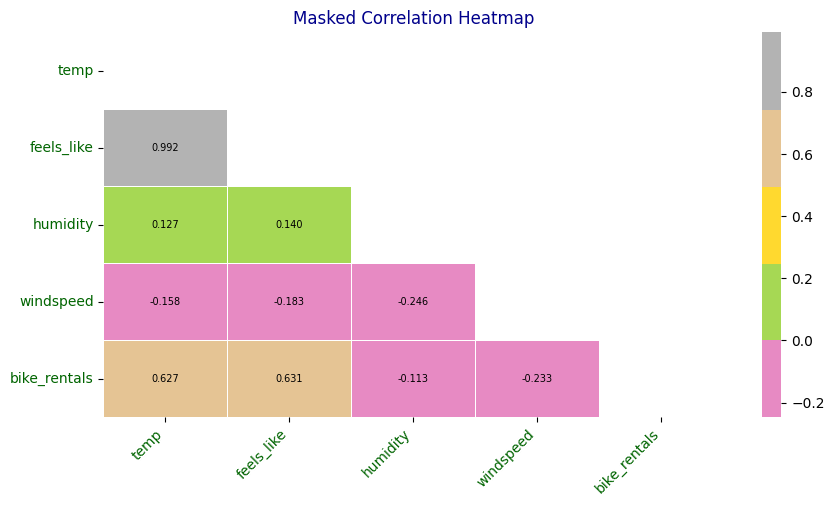

In [112]:
# Heatmap to Show Correlation Between Continuous Variables
plt.figure(figsize=(10, 5))
mask = np.triu(df[['temp', 'feels_like', 'humidity', 'windspeed', 'bike_rentals']].corr())
sns.heatmap(df[['temp', 'feels_like', 'humidity', 'windspeed', 'bike_rentals']].corr(), mask=mask, annot=True, cmap="Set2", fmt=".3f", linewidths=0.5, center=0, annot_kws={"size": 7, "color": "black"})
plt.title('Masked Correlation Heatmap', fontsize=12, color='darkblue')
plt.xticks(rotation=45, ha='right', fontsize=10, color='darkgreen')
plt.yticks(fontsize=10, color='darkgreen')
plt.show()

Inferences (between features and target variable bike_rentals):

Strong positive correlations (>0.5):
* Temperature and Feels Like Temperature with Bike Rentals: Higher temperatures and "feels like" temperatures strongly increase bike rentals.
* Bike rentals vs year: there was a strong increase in the second year.

Weak positive correlations (0<=x<=0.5):
* We can see that summer months (May-Oct) are positively correlated, further supporting that better weather increases demand for bike rentals.
* Working day also has a weak positive correlation, indicating that demand for bikes slightly increases during working days.
* Sunny weather

Weak negative correlation (-0.5<x<0):
*  Sundays & holidays are slightly negatively correlated, meaning there's slightly less demand during those days.
* Colder months (Nov-March) and rainy are also negatively correlated to bike rentals.

Strong negative correlation (<-0.5):
* Season spring, which corresponds to some of the coldest months in the dataset, further suggesting that weather plays a major role.


## Data preparation

* Preparing the data for modelling (train-test split, rescaling etc)
* Identify multicollinearity
* Identify predictors that have a strong association with the outcome variable

Add dummy variables for categorical data

In [113]:
df1 = pd.get_dummies(df,columns=["season","month","weekday","weather"],dtype=int,drop_first = True)
df1.head()

,year,holiday,workingday,temp,feels_like,humidity,windspeed,bike_rentals,season_Spring,season_Summer,...,month_Oct,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weather_Rainy,weather_Sunny
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,1
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,1
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,1


Check for correlation between all variables and identify multicollinearity

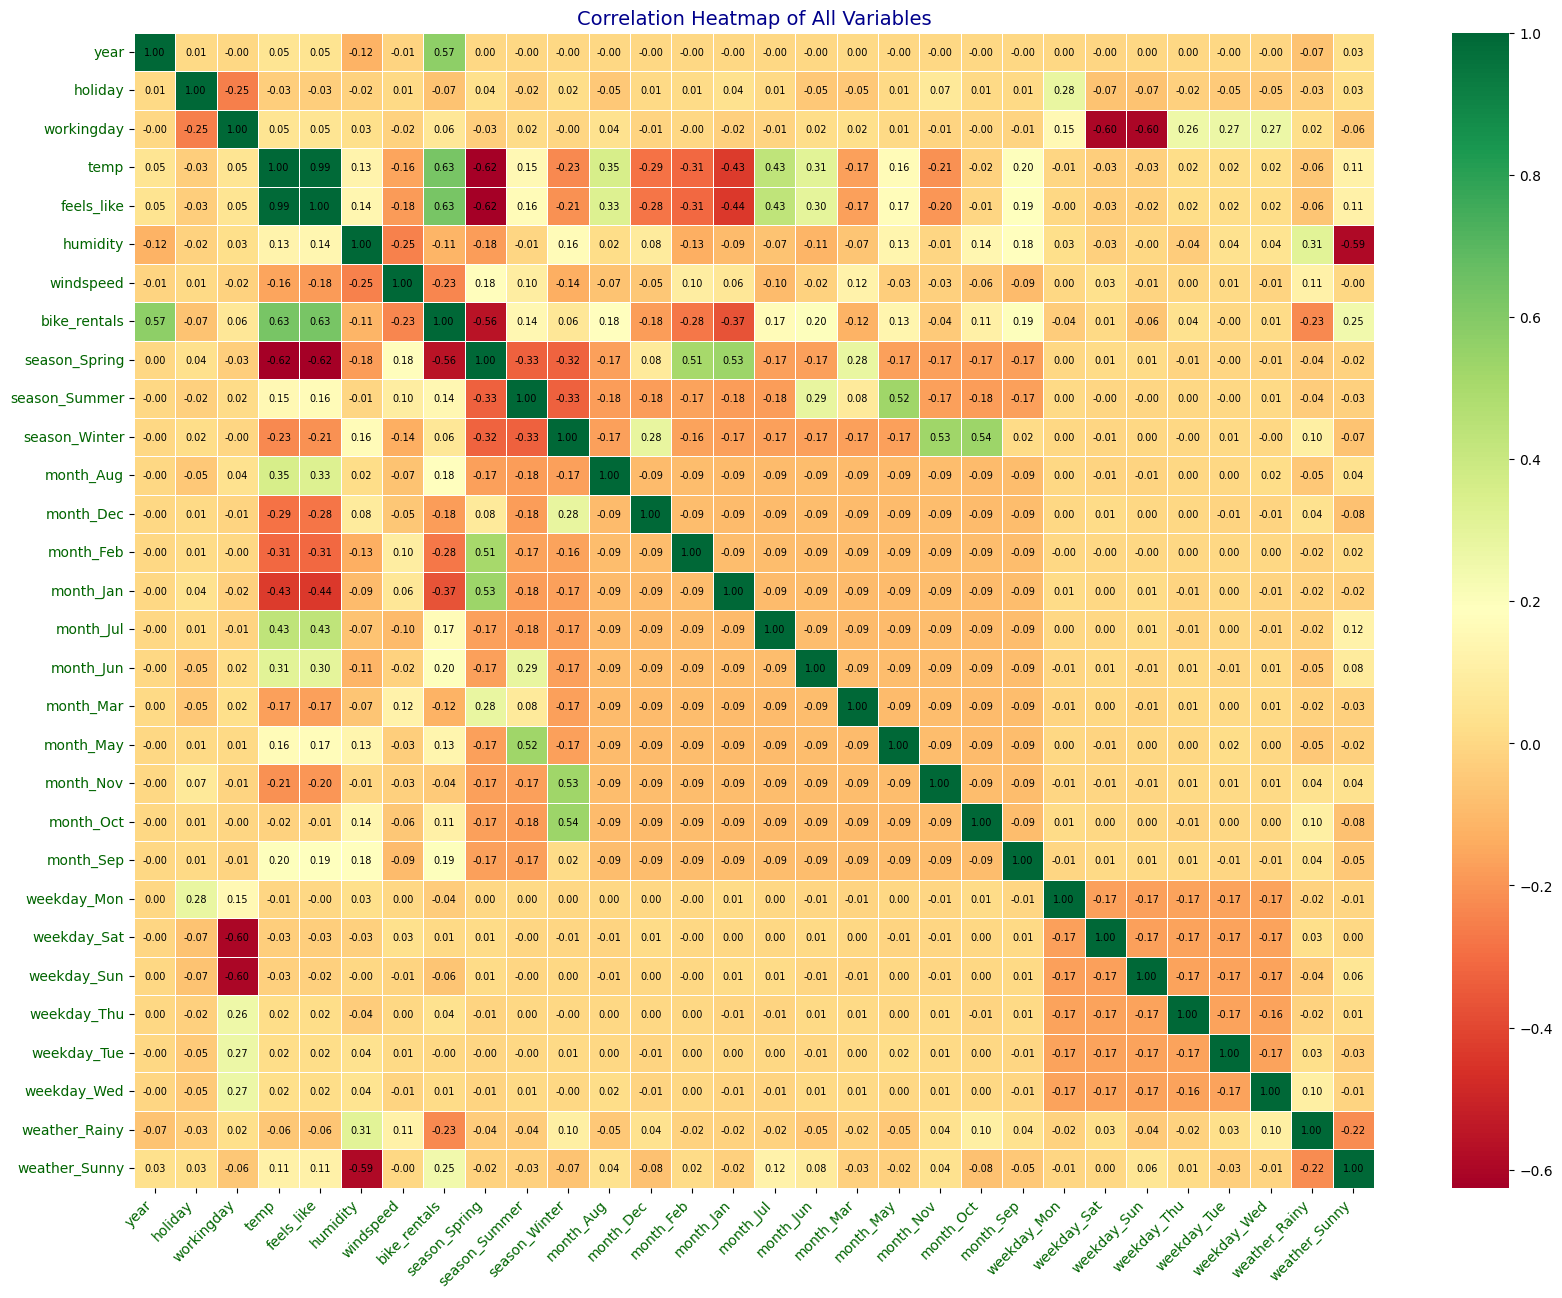

In [114]:
# Heatmap to show the correlation between all variables
plt.figure(figsize=(20, 15))
cmap = sns.color_palette("RdYlGn", as_cmap=True)  # Red to Green palette
sns.heatmap(df1.corr(), annot=True, fmt=".2f", cmap=cmap, linewidths=0.5, annot_kws={"size": 7, "color": "black"})
plt.title('Correlation Heatmap of All Variables', fontsize=14, color='darkblue')
plt.xticks(rotation=45, ha='right', fontsize=10, color='darkgreen')
plt.yticks(fontsize=10, color='darkgreen')
plt.show()

Inferences:

Strong Positive Correlations:
* Temperature and feels_like (0.99) show strong multicollinearity, meaning one of these will get dropped via RFE.

Strong Negative Correlations:
* Season_Spring with temp (-0.62) and feels_like (-0.62).
* Workingday with weekday_Sat and weekday_Sun (-0.60 each)
* 'weather_Sunny' with 'humidity' (-0.57)

Bike_rentals:
* is highly correlated with temp (0.63), feels_like (0.63), and year (0.57), showing that warmer temperatures and time drive rentals, with fewer rentals in season_Spring (-0.56).

In [115]:
# check number of features
df1.shape

(729, 30)

So we have 30 features which is quite a lot, so RFE really makes sense. Next, we want to split the data into training and testing sets.

**Splitting the Data into Training and Testing Sets**

In [116]:
# Splitting the Data into Training and Testing Sets
df1_train, df1_test = train_test_split(df1, train_size=0.7, test_size=0.3, random_state=100)
print(df1_train.shape)
print(df1_test.shape)

(510, 30)
(219, 30)


Rescaling some features:

In [117]:
scaler = MinMaxScaler()

# columns we want to aply scaler to
variables_to_scale=['temp','humidity','windspeed','bike_rentals']

df1_train[variables_to_scale] = scaler.fit_transform(df1_train[variables_to_scale])

df1_train.head()

,year,holiday,workingday,temp,feels_like,humidity,windspeed,bike_rentals,season_Spring,season_Summer,...,month_Oct,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weather_Rainy,weather_Sunny
626,1,0,1,0.614763,27.02020,0.450242,0.371638,0.864421,0,0,...,0,1,0,0,0,0,0,1,0,1
364,0,0,0,0.437201,20.70605,0.552447,0.382342,0.247978,1,0,...,0,0,0,1,0,0,0,0,0,1
426,1,0,0,0.442393,20.67460,0.559440,0.255342,0.438851,1,0,...,0,0,0,1,0,0,0,0,0,0
728,1,0,0,0.245101,11.58500,0.381387,0.663106,0.164795,1,0,...,0,0,0,0,1,0,0,0,0,1
482,1,0,0,0.395666,18.87520,0.389456,0.188475,0.457443,0,1,...,0,0,0,1,0,0,0,0,0,0


Dividing into X and Y sets for the model building

In [118]:
y_train = df1_train.pop('bike_rentals')
X_train = df1_train

## Training the model

* Fit a regression line through the training data using statsmodels.
* Add constant using sm.add_constant(X)

In [119]:
# Building model using statsmodel, for the detailed statistics
import statsmodels.api as sm

# Define the function to build and fit the model
def build_model(X_train, y_train, model_features):
    X_train_lm = X_train[model_features]  # Select the features
    X_train_lm = sm.add_constant(X_train_lm)  # Add constant
    lm = sm.OLS(y_train, X_train_lm).fit()  # Fit the model using OLS
    print(lm.summary())  # Print the statistical summary
    X_train_lm.drop('const', axis=1, inplace=True)
    return X_train_lm, lm

# Build inital model using all features
model_features = list(X_train.columns)

# Build the model
X_train_lm, lm = build_model(X_train, y_train, model_features)

                            OLS Regression Results                            
Dep. Variable:           bike_rentals   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     100.8
Date:                Wed, 04 Sep 2024   Prob (F-statistic):          1.64e-181
Time:                        07:49:07   Log-Likelihood:                 505.13
No. Observations:                 510   AIC:                            -952.3
Df Residuals:                     481   BIC:                            -829.5
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1402      0.038      3.666

Feature selection:

* Pick top features using RFE
* Prepare df with selected features

In [120]:
# Let RFE pick top 22
lr = LinearRegression()
lr.fit(X_train, y_train)

rfe = RFE(lr, n_features_to_select=22)
rfe = rfe.fit(X_train, y_train)

In [121]:
# RFE Feature Ranking
pd.DataFrame({'Rank' : rfe.ranking_, 'Selected': rfe.support_, 'Feature' : X_train.columns}).sort_values(by='Rank',ascending=True)

,Rank,Selected,Feature
0,1,True,year
23,1,True,weekday_Sun
22,1,True,weekday_Sat
21,1,True,weekday_Mon
20,1,True,month_Sep
18,1,True,month_Nov
17,1,True,month_May
16,1,True,month_Mar
27,1,True,weather_Rainy
13,1,True,month_Jan


In [122]:
# Use the selected features to build the model
model_features = list(X_train.columns[rfe.support_])
model_features

['year',
 'holiday',
 'workingday',
 'temp',
 'humidity',
 'windspeed',
 'season_Spring',
 'season_Summer',
 'season_Winter',
 'month_Dec',
 'month_Feb',
 'month_Jan',
 'month_Jul',
 'month_Mar',
 'month_May',
 'month_Nov',
 'month_Sep',
 'weekday_Mon',
 'weekday_Sat',
 'weekday_Sun',
 'weather_Rainy',
 'weather_Sunny']

In [123]:
X_train_lm,lm=build_model(X_train_lm,y_train,model_features)

                            OLS Regression Results                            
Dep. Variable:           bike_rentals   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     135.4
Date:                Wed, 04 Sep 2024   Prob (F-statistic):          3.43e-188
Time:                        07:49:23   Log-Likelihood:                 503.63
No. Observations:                 510   AIC:                            -963.3
Df Residuals:                     488   BIC:                            -870.1
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1530      0.032      4.763

Which values to drop:
1. high p-value, high VIF (VIF>5)
2. the ones with high p-values (p>0.05), low VIF
Then, recalculate..
3. remove low p-value, high VIF


In [124]:
# drop month march because it has a high p-value
model_features.remove('month_Mar')
#rebuild the model
X_train_lm,lm=build_model(X_train_lm,y_train,model_features)

                            OLS Regression Results                            
Dep. Variable:           bike_rentals   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     142.3
Date:                Wed, 04 Sep 2024   Prob (F-statistic):          3.68e-189
Time:                        07:50:19   Log-Likelihood:                 503.35
No. Observations:                 510   AIC:                            -964.7
Df Residuals:                     489   BIC:                            -875.8
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1581      0.031      5.044

In [125]:
# drop holiday since it has a high p-value
model_features.remove('holiday')
#rebuild the model
X_train_lm,lm=build_model(X_train_lm,y_train,model_features)

                            OLS Regression Results                            
Dep. Variable:           bike_rentals   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     142.3
Date:                Wed, 04 Sep 2024   Prob (F-statistic):          3.68e-189
Time:                        07:50:47   Log-Likelihood:                 503.35
No. Observations:                 510   AIC:                            -964.7
Df Residuals:                     489   BIC:                            -875.8
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1559      0.048      3.277

In [126]:
# drop weekday_Sunday because it has high p-value
model_features.remove('weekday_Sun')
#rebuild the model
X_train_lm,lm=build_model(X_train_lm,y_train,model_features)

                            OLS Regression Results                            
Dep. Variable:           bike_rentals   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     149.9
Date:                Wed, 04 Sep 2024   Prob (F-statistic):          3.67e-190
Time:                        07:51:07   Log-Likelihood:                 503.13
No. Observations:                 510   AIC:                            -966.3
Df Residuals:                     490   BIC:                            -881.6
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1731      0.040      4.349

In [127]:
# drop weekday mon because it has a high p value
model_features.remove('weekday_Mon')
#rebuild the model
X_train_lm,lm=build_model(X_train_lm,y_train,model_features)

                            OLS Regression Results                            
Dep. Variable:           bike_rentals   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     158.0
Date:                Wed, 04 Sep 2024   Prob (F-statistic):          5.52e-191
Time:                        07:51:46   Log-Likelihood:                 502.45
No. Observations:                 510   AIC:                            -966.9
Df Residuals:                     491   BIC:                            -886.4
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1733      0.040      4.354

In [130]:
# drop season summer (high vif)
model_features.remove('season_Summer')
#rebuild the model
X_train_lm,lm=build_model(X_train_lm,y_train,model_features)

                            OLS Regression Results                            
Dep. Variable:           bike_rentals   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     167.2
Date:                Wed, 04 Sep 2024   Prob (F-statistic):          8.00e-192
Time:                        07:58:04   Log-Likelihood:                 501.77
No. Observations:                 510   AIC:                            -967.5
Df Residuals:                     492   BIC:                            -891.3
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1978      0.034      5.901

Now all features have good p-values. We can move on!

Multicollinearity checks

In [132]:
# make a copy of this so we can bring this version back
original_model_features = model_features.copy()
original_X_train = X_train.copy()

In [133]:
# calculate vif
def checkvif(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

checkvif(X_train_lm)

         Features    VIF
2            temp  18.96
3        humidity  14.82
5   season_Spring   4.49
1      workingday   4.31
4       windspeed   4.23
16  weather_Sunny   3.55
6   season_Winter   3.05
9       month_Jan   2.23
0            year   2.12
8       month_Feb   1.90
12      month_Nov   1.82
7       month_Dec   1.74
14    weekday_Sat   1.67
10      month_Jul   1.52
11      month_May   1.36
13      month_Sep   1.29
15  weather_Rainy   1.17


In [134]:
# temp has a very high vif, lets drop it, but in a way that we can bring it back

# Backup original features and original X_train to avoid issues when rebuilding
original_model_features = model_features.copy()
original_X_train = X_train.copy()

# Drop 'temp', rebuild the model without temp
model_features.remove('temp')
X_train_lm, lm = build_model(original_X_train, y_train, model_features)

                            OLS Regression Results                            
Dep. Variable:           bike_rentals   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     119.6
Date:                Wed, 04 Sep 2024   Prob (F-statistic):          4.65e-158
Time:                        08:02:12   Log-Likelihood:                 418.15
No. Observations:                 510   AIC:                            -802.3
Df Residuals:                     493   BIC:                            -730.3
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4155      0.035     11.934

As we can see, dropping temp is not an option because the model has worsened, e.g. R squared has dropped significantly. So let's bring back temp.

In [135]:
# Bring back 'temp'
model_features = original_model_features.copy()  # Restore the original model features

# Now, remove 'humidity' instead of 'temp'
model_features.remove('humidity')

# Rebuild the model with 'temp' and without 'humidity'
X_train_lm, lm = build_model(original_X_train, y_train, model_features)

                            OLS Regression Results                            
Dep. Variable:           bike_rentals   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     168.9
Date:                Wed, 04 Sep 2024   Prob (F-statistic):          3.12e-188
Time:                        08:02:18   Log-Likelihood:                 490.47
No. Observations:                 510   AIC:                            -946.9
Df Residuals:                     493   BIC:                            -874.9
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1037      0.028      3.766

In [136]:
#recalculate vif
checkvif(X_train_lm)

         Features   VIF
2            temp  8.00
3       windspeed  4.23
1      workingday  4.20
4   season_Spring  3.97
15  weather_Sunny  2.82
5   season_Winter  2.61
8       month_Jan  2.12
0            year  2.10
7       month_Feb  1.88
11      month_Nov  1.79
13    weekday_Sat  1.65
6       month_Dec  1.64
9       month_Jul  1.48
10      month_May  1.29
12      month_Sep  1.28
14  weather_Rainy  1.10


In [138]:
# lets remove month may because it has high p value
model_features.remove('month_May')
X_train_lm,lm=build_model(X_train_lm,y_train,model_features)

                            OLS Regression Results                            
Dep. Variable:           bike_rentals   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.7
Date:                Wed, 04 Sep 2024   Prob (F-statistic):          5.93e-189
Time:                        08:07:41   Log-Likelihood:                 489.47
No. Observations:                 510   AIC:                            -946.9
Df Residuals:                     494   BIC:                            -879.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1098      0.027      4.038

In [139]:
# calculate vif
checkvif(X_train_lm)

         Features   VIF
2            temp  7.62
3       windspeed  4.23
1      workingday  4.17
4   season_Spring  3.89
14  weather_Sunny  2.82
5   season_Winter  2.53
8       month_Jan  2.12
0            year  2.10
7       month_Feb  1.88
10      month_Nov  1.79
12    weekday_Sat  1.65
6       month_Dec  1.64
9       month_Jul  1.39
11      month_Sep  1.23
13  weather_Rainy  1.10


In [140]:
# since we cant remove temp, lets try to remove windpspeed to bring vif down
model_features.remove('windspeed')
X_train_lm,lm=build_model(X_train_lm,y_train,model_features)

                            OLS Regression Results                            
Dep. Variable:           bike_rentals   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     180.5
Date:                Wed, 04 Sep 2024   Prob (F-statistic):          3.96e-184
Time:                        08:09:25   Log-Likelihood:                 475.23
No. Observations:                 510   AIC:                            -920.5
Df Residuals:                     495   BIC:                            -856.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0555      0.026      2.142

In [142]:
# remove month feb
model_features.remove('month_Feb')
X_train_lm,lm=build_model(X_train_lm,y_train,model_features)

                            OLS Regression Results                            
Dep. Variable:           bike_rentals   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     193.1
Date:                Wed, 04 Sep 2024   Prob (F-statistic):          1.77e-184
Time:                        08:12:10   Log-Likelihood:                 473.32
No. Observations:                 510   AIC:                            -918.6
Df Residuals:                     496   BIC:                            -859.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0457      0.025      1.793

In [143]:
# remove month jan
model_features.remove('month_Jan')
X_train_lm,lm=build_model(X_train_lm,y_train,model_features)

                            OLS Regression Results                            
Dep. Variable:           bike_rentals   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     208.0
Date:                Wed, 04 Sep 2024   Prob (F-statistic):          5.77e-185
Time:                        08:12:44   Log-Likelihood:                 471.70
No. Observations:                 510   AIC:                            -917.4
Df Residuals:                     497   BIC:                            -862.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0360      0.025      1.444

In [144]:
# vif
checkvif(X_train_lm)

         Features   VIF
2            temp  6.25
1      workingday  4.07
11  weather_Sunny  2.79
4   season_Winter  2.45
0            year  2.10
7       month_Nov  1.75
3   season_Spring  1.62
9     weekday_Sat  1.62
5       month_Dec  1.46
6       month_Jul  1.35
8       month_Sep  1.23
10  weather_Rainy  1.08


In [146]:
# remove workingday since we cant remove temp
model_features.remove('workingday')
X_train_lm,lm=build_model(X_train_lm,y_train,model_features)

                            OLS Regression Results                            
Dep. Variable:           bike_rentals   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     212.5
Date:                Wed, 04 Sep 2024   Prob (F-statistic):          4.13e-180
Time:                        08:13:51   Log-Likelihood:                 457.40
No. Observations:                 510   AIC:                            -890.8
Df Residuals:                     498   BIC:                            -840.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0840      0.024      3.512

In [147]:
# remove weekday sat
model_features.remove('weekday_Sat')
X_train_lm,lm=build_model(X_train_lm,y_train,model_features)

                            OLS Regression Results                            
Dep. Variable:           bike_rentals   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     233.4
Date:                Wed, 04 Sep 2024   Prob (F-statistic):          5.55e-181
Time:                        08:14:30   Log-Likelihood:                 456.63
No. Observations:                 510   AIC:                            -891.3
Df Residuals:                     499   BIC:                            -844.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0869      0.024      3.652

In [148]:
# vif
checkvif(X_train_lm)

        Features   VIF
1           temp  3.87
9  weather_Sunny  2.78
3  season_Winter  2.40
0           year  2.09
6      month_Nov  1.75
4      month_Dec  1.45
2  season_Spring  1.37
5      month_Jul  1.34
7      month_Sep  1.22
8  weather_Rainy  1.08


All p-values are below 0.05 and all VIF values are below 5, this model is final.

In [150]:
# make a copy
original_model_features = model_features.copy()
original_X_train = X_train.copy()

In [149]:
lm.params

,0
const,0.086918
year,0.244246
temp,0.478359
season_Spring,-0.126044
season_Winter,0.083226
month_Dec,-0.041693
month_Jul,-0.064453
month_Nov,-0.063904
month_Sep,0.056894
weather_Rainy,-0.190943


## Residual analysis

Now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression).

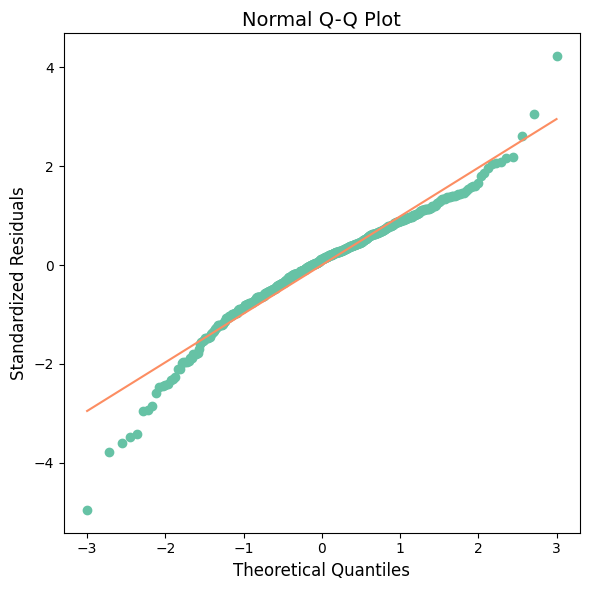

In [151]:
# Visualizing residuals using a QQ plot with custom colors from Seaborn palette
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

colors = sns.color_palette("Set2", len(continuous_variables))
standardized_residuals = lm.get_influence().resid_studentized_internal

fig, ax = plt.subplots(figsize=(6, 6))
stats.probplot(standardized_residuals, dist="norm", plot=ax)

ax.get_lines()[0].set_color(colors[0])
ax.get_lines()[1].set_color(colors[1])

ax.set_title('Normal Q-Q Plot', fontsize=14)
ax.set_xlabel('Theoretical Quantiles', fontsize=12)
ax.set_ylabel('Standardized Residuals', fontsize=12)

plt.tight_layout()
plt.show()

The majority of data points align closely with the diagonal line, indicating that the residuals are approximately normally distributed, which satisfies a key assumption for linear regression.

In [152]:
# Predict using model built
X_train_lm = sm.add_constant(X_train_lm)
y_train_predicted = lm.predict(X_train_lm)

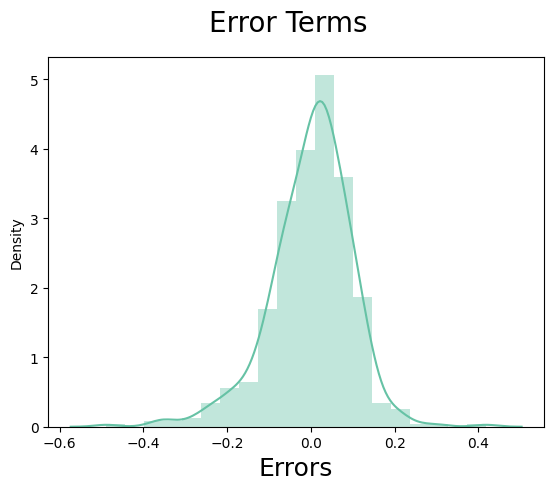

In [154]:
# Error terms (histogram of the error terms)
fig = plt.figure()
sns.distplot((y_train - y_train_predicted), bins=20, color=colors[0])
fig.suptitle('Error Terms', fontsize=20)  # Plot heading
plt.xlabel('Errors', fontsize=18)
plt.show()

The histogram of errors is bell-shaped, centered around zero, and symmetric. This further confirms that the residuals are normally distributed, supporting the assumption of normally distributed error terms.

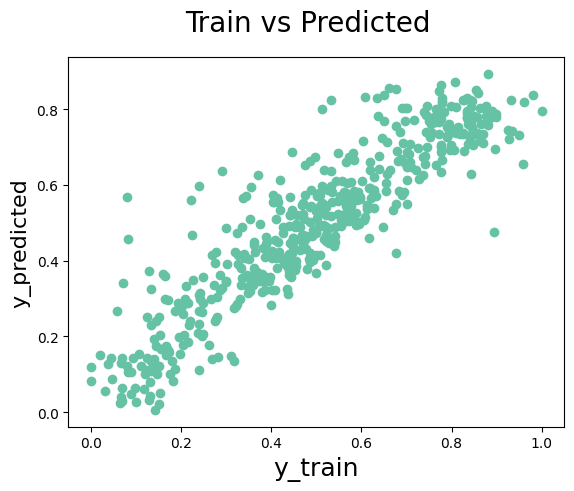

In [155]:
# Train vs predicted
# Plot the scatter plot of Train vs Predicted with custom colors
fig = plt.figure()
plt.scatter(y_train, y_train_predicted, color=colors[0])
fig.suptitle('Train vs Predicted', fontsize=20)  # Plot heading
plt.xlabel('y_train', fontsize=18)               # X-label
plt.ylabel('y_predicted', fontsize=16)           # Y-label
plt.show()

The scatter plot of predicted vs actual values shows a reasonably strong linear relationship, with most points clustered around the diagonal. This indicates that the model is capturing the relationship between the features and the target variable effectively.

Assumptions for linear regressions are met.

In [158]:
# Train R2 Score
r2_train = r2_score(y_train, y_train_predicted)
print(f"{r2_train:.4f}% of the variance in the target variable (bike_rentals) is explained by the predictors in the model.")

0.8238% of the variance in the target variable (bike_rentals) is explained by the predictors in the model.


In [157]:
adj_r2_train = 1 - (1 - r2_train) * (y_train.shape[0] - 1) / (y_train.shape[0] - len(model_features) - 1)
adj_r2_train

0.8203097403865933

Those 2 values suggest a pretty strong model fit.

## Model Evaluation

In [159]:
# Scale the test dataset using the same scaler applied to the training data, and display the first few rows
df1_test[variables_to_scale] = scaler.transform(df1_test[variables_to_scale])
df1_test.head()

,year,holiday,workingday,temp,feels_like,humidity,windspeed,bike_rentals,season_Spring,season_Summer,...,month_Oct,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weather_Rainy,weather_Sunny
185,0,0,1,0.856704,34.81690,0.519634,0.180484,0.511167,0,0,...,0,0,0,0,0,0,1,0,0,1
639,1,0,1,0.662528,27.11665,0.882733,0.133655,0.508028,0,0,...,1,0,0,0,0,0,1,0,1,0
300,0,0,1,0.338555,15.94060,0.513716,0.402389,0.400338,0,0,...,1,0,0,0,0,0,0,0,0,0
222,0,0,1,0.820361,32.57605,0.304464,0.263333,0.526500,0,0,...,0,0,0,0,0,1,0,0,0,1
153,0,0,1,0.698871,29.35665,0.214632,0.453215,0.589279,0,1,...,0,0,0,0,0,0,0,0,0,1


In [161]:
# Use the model to predict
y_test = df1_test.pop('bike_rentals')
X_test = df1_test[model_features]
X_test_lm = sm.add_constant(X_test)
y_test_predicted = lm.predict(X_test_lm)

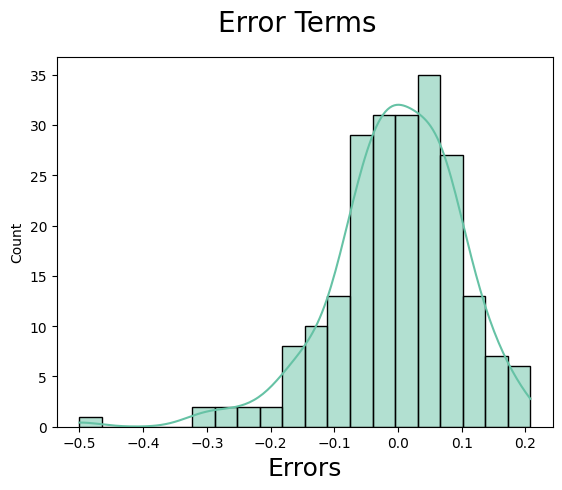

In [162]:
# error terms (histogram of error terms)
# Plot the histogram of the error terms with custom colors
fig = plt.figure()
sns.histplot((y_test - y_test_predicted), bins=20, color=colors[0], kde=True)
fig.suptitle('Error Terms', fontsize = 20)  # Plot heading
plt.xlabel('Errors', fontsize = 18)         # X-label
plt.show()

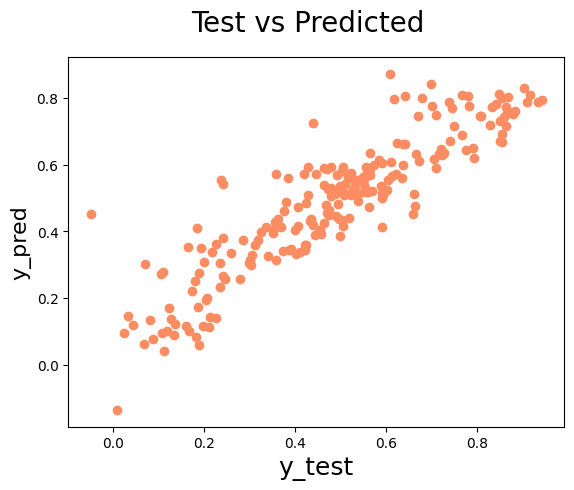

In [163]:
# Test Vs Predicated
# Plot test vs predicted with custom colors
fig = plt.figure()
plt.scatter(y_test, y_test_predicted, color=colors[1])
fig.suptitle('Test vs Predicted', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

In [164]:
# Test R2 Score
r2_test = r2_score(y_test, y_test_predicted)
print(f"{r2_test:.4f}% of the variance in the target variable (bike_rentals) is explained by the predictors in the model.")

0.8067% of the variance in the target variable (bike_rentals) is explained by the predictors in the model.


In [165]:
# Test Adjusted R2 Score
adj_r2_test = 1 - (1 - r2_test) * (y_test.shape[0] - 1) / (y_test.shape[0] - len(model_features) - 1)
adj_r2_test

0.7973738765893663

In [166]:
#R^2 Comparison
print('Train R² Score : ',round(r2_train,3))
print('Test  R² Score : ',round(r2_test,3))
print('Train - Test   : ',round(r2_train - r2_test,3))

Train R² Score :  0.824
Test  R² Score :  0.807
Train - Test   :  0.017


In [167]:
# Adjusted R^2 Comparison
print('Train Adjusted  R² Score : ',round(adj_r2_train,3))
print('Test  Adjusted  R² Score : ',round(adj_r2_test,3))
print('Train - Test             : ',round(adj_r2_train - adj_r2_test,3))

Train Adjusted  R² Score :  0.82
Test  Adjusted  R² Score :  0.797
Train - Test             :  0.023


These values fall into the acceptable range, indicating that my model is able to generalize well with only a small difference between the train and test Adjusted R² scores (0.023) and R² scores (0.017).

## Conclusions
- The model, with a Train R² score of 82.4% and a Test R² score of 80.7%, effectively predicts bike rentals, showing minimal overfitting with an acceptable difference between the training and test set performance. The Adjusted R² values (Train: 82%, Test: 79.7%) confirm the model's reliability.

Key inferences:
* Temperature: Temperature is the strongest predictor of bike rentals. Rentals peak at moderate temperatures (11-13°C and 26-28°C), while extreme cold (below 7°C) or heat (over 32°C) reduces demand.
* Seasonal Impact: Fall and Summer drive the highest bike rentals, with September standing out as the peak month, while January & February are the months with the least demand.
* Year-over-Year Growth: Bike rentals increased significantly from 2018 to 2019, reflecting strong growth in the second year.
* Weather: Sunny weather boosts rentals, while rainy conditions drastically reduce them.
* Windspeed and Humidity: Although both variables have a weaker overall impact, a too high or too low windspeed or humidity do reduce bike demand.

Recommendations:

* Temperature-Driven Campaigns: Focus promotions on moderate temperature ranges, where demand is highest.

* Seasonal Pricing Adjustments: Increase prices during Fall and Summer. Offer discounts or bundles during Winter and Spring to boost demand in off-peak seasons.

* Weather-Responsive Offers: Implement dynamic pricing—lower rates for rainy or windy days, premium rates on sunny days.

* Yearly Growth Campaigns: Leverage year-over-year growth by expanding marketing efforts and introducing summer add-ons like bicycle tours or special experiences.

* Weekend and Weekday Optimization: Use weekend offers and partner with companies to encourage weekday commuting, with discounts for employees.

* Strategic Partnerships: Collaborate with organizations to integrate bike rentals into daily commutes, promoting eco-friendly transport.

* Data-Driven Adjustments: Regularly update pricing, promotions, and inventory based on real-time data to stay agile and capture growth opportunities.